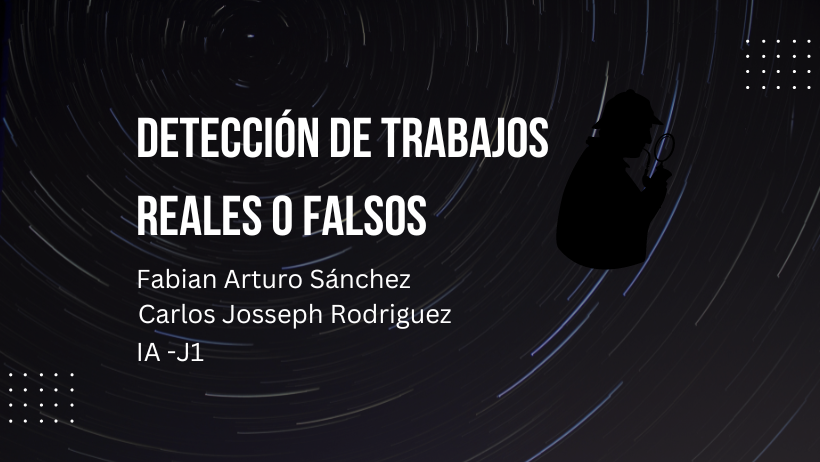

In [ ]:
#@title **Detección de trabajos reales o falsos**
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/Proyecto IA/Red and White Modern Master Gaming Facebook Cover  (1).png")

# Introduccion
El objetivo del proyecto es a traves de IA clasificar trabajos fraudulentos o reales con ayuda de este dataset el cual contiene 18000 descripciones de puestos, de las cuales unas 800 son falsas, El conjunto de datos se puede utilizar para crear modelos de clasificación que pueden aprender las descripciones u otras caracteristicas de trabajos que pueden ser fraudulentas.


#Lectura del dataset
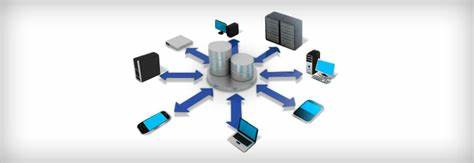

From google.colab import files https://www.kaggle.com/datasets/whenamancodes/real-or-fake-jobs files.upload()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto IA/fake_job_postings.csv')
df.head(10)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


#Limpieza del dataset

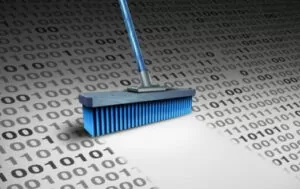


Realizamos un pulido de los datos dentro de nuestro dataset con el fin de usar unicamente la informacion que sea necesaria.


In [ ]:
df1 = df.drop(columns=["department", "salary_range","benefits",
"industry", "function","company_profile"])


# 1. Clasificacion y tratamientos de datos

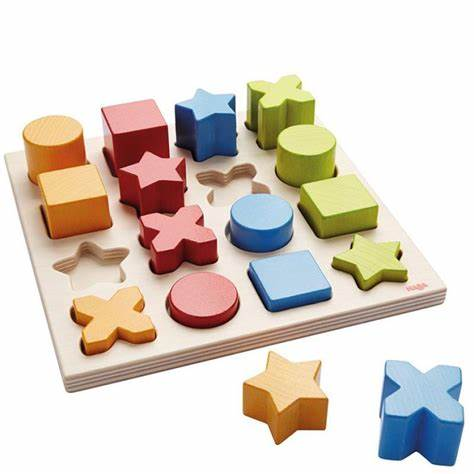

en esta seccion vamos a clasificar toda la informacion dentro de nuestro data set con el fin de hacerla mas versatil para nuestro proyecto, a continuacion podremos encontrar las funciones usadas para hacer toda la clasificacion y distribucion de datos dentro de nuestro dataset:

In [ ]:
df1.dropna(inplace=True)

df1['description'] = df1.description.apply(lambda x: len(x.split()))
df1['title'] = df1.title.apply(lambda x: len(x.split()))
df1['requirements'] = df1.requirements.apply(lambda x: len(x.split()))

location = list(pd.Categorical(df1['location']).categories)
df1['location'].replace(location, range(len(location)), inplace=True)

In [ ]:
location = list(pd.Categorical(df1['location']).categories)
df1['location'].replace(location, range(len(location)), inplace=True)

employment_type = list(pd.Categorical(df1['employment_type']).categories)
df1['employment_type'].replace(employment_type, range(len(employment_type)), inplace=True)

required_experience = list(pd.Categorical(df1['required_experience']).categories)
df1['required_experience'].replace(required_experience, range(len(required_experience)), inplace=True)

required_education = list(pd.Categorical(df1['required_education']).categories)
df1['required_education'].replace(required_education, range(len(required_education)), inplace=True)

df1

,job_id,title,location,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
3,4,5,961,346,176,0,1,0,1,5,1,0
4,5,3,982,168,89,0,1,1,1,5,1,0
6,7,4,105,57,77,0,1,1,1,5,5,0
9,10,6,759,150,93,0,1,0,3,2,4,0
10,11,8,1318,323,323,0,0,0,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17865,17866,9,326,211,129,0,1,1,1,2,1,0
17867,17868,2,394,96,21,0,1,0,1,2,9,0
17870,17871,4,806,121,39,0,1,1,1,5,1,0
17876,17877,2,1521,161,111,0,1,1,1,5,1,0


In [ ]:
import sklearn
df_ale=sklearn.utils.shuffle(df1)
df_ale

,job_id,title,location,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
7315,7316,3,612,210,38,0,1,1,4,4,4,0
14736,14737,2,420,56,182,0,1,1,1,5,1,0
6450,6451,3,1657,109,99,0,1,1,1,6,9,0
10523,10524,2,1666,255,28,0,1,0,1,5,1,0
8370,8371,4,1055,161,87,0,1,1,3,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14339,14340,3,326,56,60,0,1,0,1,0,1,0
15468,15469,1,1639,71,31,0,0,0,1,2,4,0
4925,4926,2,503,112,30,0,1,0,1,0,1,0
17074,17075,3,985,285,68,0,1,1,1,5,4,0


In [ ]:
ax= df_ale['fraudulent'].value_counts().sort_values()
ax

1     331
0    7486
Name: fraudulent, dtype: int64

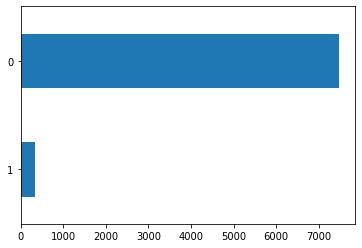

In [ ]:
ax= df_ale['fraudulent'].value_counts().sort_values().plot(kind = 'barh')



# 2. Implementacion de algoritmos de MACHINE LEARNING

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

d = df_ale
print(d.shape)
feature_cols = ['telecommuting','has_company_logo','has_questions','title',	'location',	'description',	'requirements',	'telecommuting',	'employment_type',	'required_experience'	,'required_education'	]
X = d[feature_cols].values
y = d.fraudulent.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)



(7817, 12)


## 2.1 GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
est = GaussianNB()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.928388746803069


## 2.2 Decision Tree classifier 


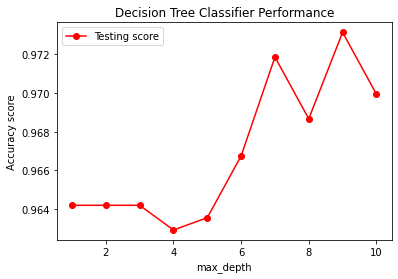

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Definir una lista de valores de max_depth a probar
max_depths = range(1, 11)

train_scores = []
test_scores = []

for depth in max_depths:
    est = DecisionTreeClassifier(max_depth=depth)
    est.fit(X_train, y_train)
    test_score = est.score(X_test, y_test)
    test_scores.append(test_score)

# Crear una gráfica para mostrar los puntajes en función de max_depth

plt.plot(max_depths, test_scores, 'ro-', label="Testing score")
plt.xlabel("max_depth")
plt.ylabel("Accuracy score")
plt.title("Decision Tree Classifier Performance")
plt.legend(loc="best")
plt.show()


### Método cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

est = DecisionTreeClassifier(max_depth=10)

s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.962 (+/- 0.00399)
tpr      0.482 (+/- 0.02572)
tnr      0.986 (+/- 0.00170)


In [ ]:
est.fit(X_train,y_train)
est.feature_importances_

array([0.00507007, 0.03605096, 0.03251944, 0.06548017, 0.3768284 ,
       0.17321123, 0.13894546, 0.00951541, 0.02096173, 0.0680182 ,
       0.07339894])

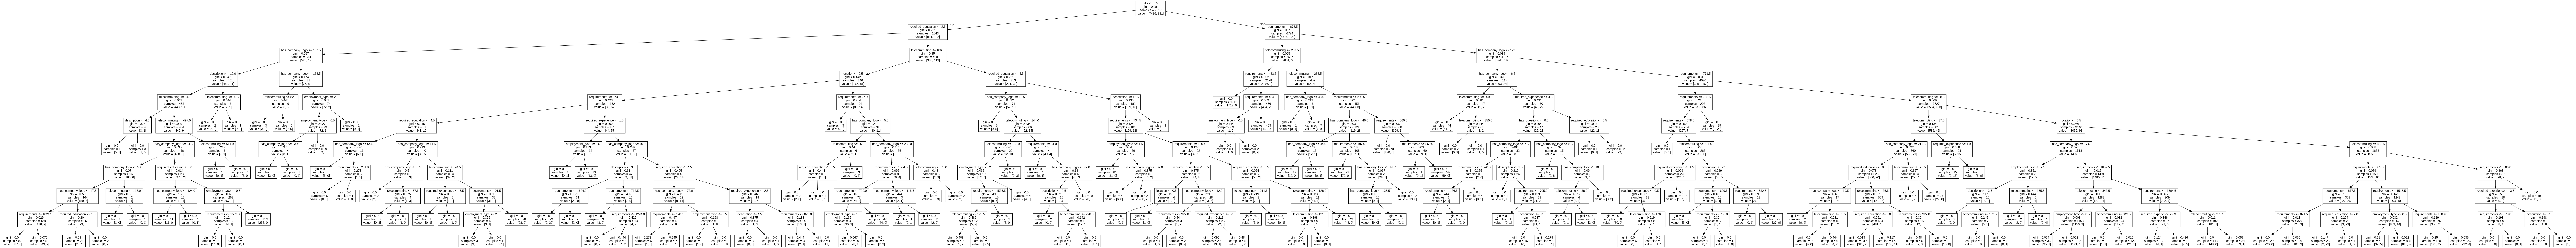

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
est.fit(X, y)
export_graphviz(est, out_file='tree_c.dot', feature_names=d.columns[:-1].values)
!dot -Tpng tree_c.dot > tree_c.png

Image(filename='tree_c.png') 

## 2.3 Random Forest classifier 


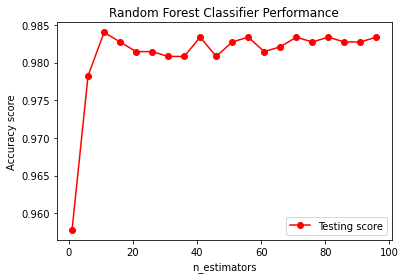

In [ ]:
from sklearn.ensemble import RandomForestClassifier
n_estimators_list = range(1, 101, 5)
train_scores = []
test_scores = []


for n_estimators in n_estimators_list:

    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_scores.append(test_score)

# Crear una gráfica para mostrar los puntajes en función de n_estimators
plt.plot(n_estimators_list, test_scores, 'ro-', label="Testing score")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy score")
plt.title("Random Forest Classifier Performance")
plt.legend(loc="best")
plt.show()

## 2.4 Support vector machine 


In [ ]:
from sklearn.svm import SVC
est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9641943734015346


### 2.4.1 Support vector machine( linear )

In [ ]:
from sklearn.svm import SVC
est = SVC()
est = SVC(kernel='linear')
est.fit(X_train, y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9641943734015346


### 2.4.2 Support vector machine( poly )

In [ ]:
from sklearn.svm import SVC
est = SVC()
est = SVC(kernel='poly')
est.fit(X_train, y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9641943734015346


### 2.4.3 Support vector machine( sigmoid )

In [ ]:
est = SVC(kernel='sigmoid')
est.fit(X_train, y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9641943734015346


## 3. Comparación perfomances machine learning

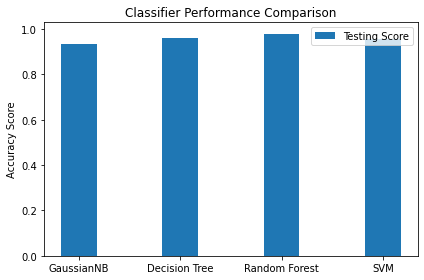

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


gnb = GaussianNB()
dtc = DecisionTreeClassifier(max_depth=10)
rfc = RandomForestClassifier(n_estimators=50)
svc = SVC()

# Entrenar los modelos
gnb.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Calcular los puntajes de precisión en los conjuntos de entrenamiento y prueba

gnb_test_score = gnb.score(X_test, y_test)

dtc_test_score = dtc.score(X_test, y_test)

rfc_test_score = rfc.score(X_test, y_test)

svc_test_score = svc.score(X_test, y_test)

# Crear una gráfica para mostrar los puntajes de precisión de los diferentes modelos
labels = ['GaussianNB', 'Decision Tree', 'Random Forest', 'SVM']

test_scores = [gnb_test_score, dtc_test_score, rfc_test_score, svc_test_score]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

rects2 = ax.bar(x , test_scores, width, label='Testing Score')

ax.set_ylabel('Accuracy Score')
ax.set_title('Comparación de rendimiento del clasificador')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

## 4. Deep learning

In [ ]:
from tensorflow import keras
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape= X_train[0].shape),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 11)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               1536      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 9,922
Trainable params: 9,922
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 7s 14ms/step - loss: 7.5879 - accuracy: 0.1324
Epoch 2/10
196/196 [==============================] - 2s 9ms/step - loss: 7.6285 - 

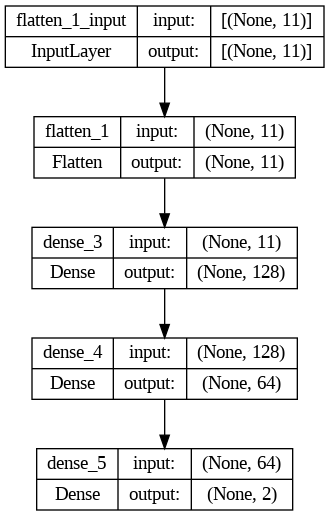

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='modelo.png', show_shapes=True, show_layer_names=True)